In [19]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()

In [20]:
training_images.shape, training_labels.shape,val_images.shape, val_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [21]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

val_images=val_images.reshape(10000, 28, 28, 1)
val_images=val_images/255.0

In [22]:
training_images.shape, training_labels.shape,val_images.shape, val_labels.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [23]:
model = tf.keras.models.Sequential([
  # input shape is 28*28*1
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # output shape is 26*26*64 or 64 feature maps (channels). since there is no padding so output becomes 26*26*64
  # parameters are for 64 filter of size 3*3 and 64 weight so, 64*10= 640
  tf.keras.layers.MaxPooling2D(2, 2),
  # output shape is 13*13*64. since we are using 2*2 pooling. Channels stay the same: 64
  # parameters are 0 since we are not using any weights in pooling layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  # output shape is 11*11*64. Channels stay the same: 64. since there is no padding so output becomes 11*11*64
  # parameters are for 64 filter (each channel does not have a different weight) each of size 3*3 so 64*9 = 576 and 1 bias for each filter so 576+1= 577. Channels stay the same: 64
  # so total parameters are 577*64 = 36928
  tf.keras.layers.MaxPooling2D(2,2),
  # output shape is 5*5*64. since we are using 2*2 pooling. Channels stay the same: 64
  tf.keras.layers.Flatten(),
  # output shape is 1600. since we are flattening the 5*5*64 feature maps
  # parameters are 0 since we are not using any weights in flattening layer
  tf.keras.layers.Dense(20, activation='relu'),
  # output shape is 20. since we are using dense layer with 20 neurons
  # parameters are 1600*20 = 32000 + 20 bias = 32020
  # so total parameters are 32020
  tf.keras.layers.Dense(10, activation='softmax')
  # output shape is 10. since we are using dense layer with 10 neurons for 10 classes
  # parameters are 20*10 = 200 + 10 bias = 210
])

c:\Users\xperi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │        32,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,798 (272.65 KB)

 Trainable params: 69,798 (272.65 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9684 - loss: 0.0845 - val_accuracy: 0.9018 - val_loss: 0.3680
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9696 - loss: 0.0813 - val_accuracy: 0.9001 - val_loss: 0.3950
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9723 - loss: 0.0767 - val_accuracy: 0.9017 - val_loss: 0.3811
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9743 - loss: 0.0685 - val_accuracy: 0.9039 - val_loss: 0.4210
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9762 - loss: 0.0639 - val_accuracy: 0.9018 - val_loss: 0.4501
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9749 - loss: 0.0659 - val_accuracy: 0.9033 - val_loss: 0.4549
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9791 - loss: 0.0604 - val_accuracy: 0.8904 - val_loss: 0.5175
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9777 - 

In [38]:
## Vizualise
print(val_labels[:100])

import matplotlib.pyplot as plt
def show_image(img):
  plt.figure()
  plt.imshow(val_images[img].reshape(28,28))
  plt.grid(False)
  plt.show()  

# By scanning the list above I saw that the 0, 23 and 28 entries are all label 9 
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
# For shoes (0, 23, 28), Convolution_Number=1 (i.e. the second filter) shows
# the sole being filtered out very clearly

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


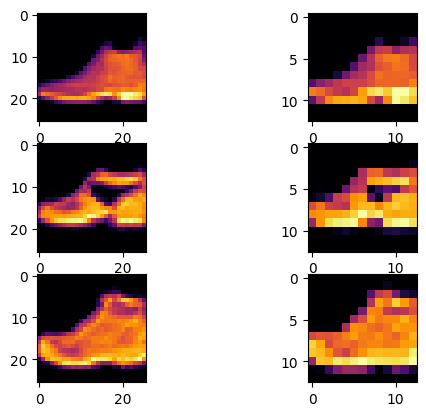

In [39]:
f, axarr = plt.subplots(3,2)
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs = layer_outputs)
for x in range(0,2):
  f1 = activation_model.predict(val_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(val_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(val_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

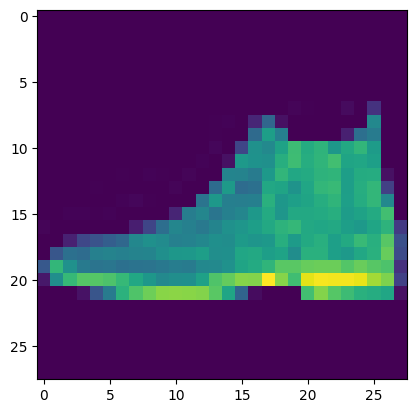

In [40]:
show_image(FIRST_IMAGE)

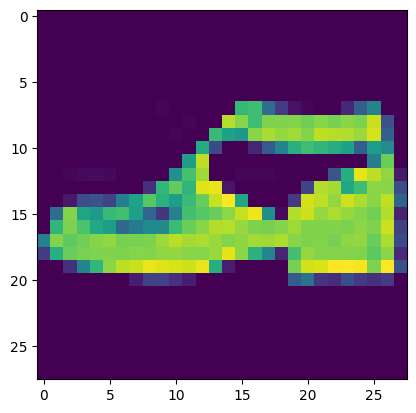

In [41]:
show_image(SECOND_IMAGE)

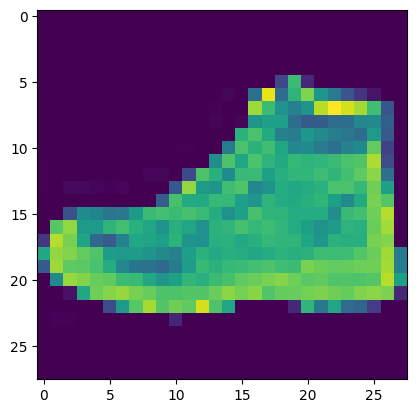

In [42]:
show_image(THIRD_IMAGE)